# Exploratory Data Analysis: The Superstore ! 🏪

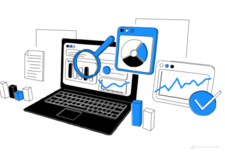

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
%pip install kaggle

## Collecting data :

In [ ]:
!kaggle datasets download -d vivek468/superstore-dataset-final -p /content/superstore_data

Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 76.2MB/s]


In [ ]:
!unzip /content/superstore_data/superstore-dataset-final.zip -d /content/superstore_data/

Archive:  /content/superstore_data/superstore-dataset-final.zip
  inflating: /content/superstore_data/Sample - Superstore.csv  


In [ ]:
%ls

sample_data/  superstore_data/


In [ ]:
df = pd.read_csv("superstore_data/Sample - Superstore.csv", encoding='windows-1252')

In [ ]:
df.head().style.set_properties(**{"background-color": "#354a3d","color": "white","border-color": "black","font-size":"9pt",'width': 200})

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960000,2,0.000000,41.913600
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.940000,3,0.000000,219.582000
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.620000,2,0.000000,6.871400
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577500,5,0.450000,-383.031000
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.200000,2.516400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Visualization:

**Categorical value Vs Numerical Value:** *Goal: Understand The Average Sales across different Regions.*

In [ ]:
df_bar=df[["Sales","Region"]]

In [ ]:
df_bar=df_bar.groupby("Region").mean().sort_values(by="Sales",ascending=False)

In [ ]:
plt.figure(figsize=[15,8])

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [ ]:
plt.suptitle("Average Sales Across Different Regions", size=20)

Text(0.5, 0.98, 'Average Sales Across Different Regions')

<Figure size 640x480 with 0 Axes>

<BarContainer object of 4 artists>

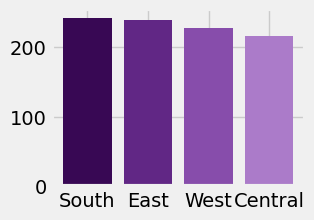

In [ ]:
# BarChart
plt.subplot(2,2,2)
plt.bar(x=df_bar.index, height='Sales', color=['#380854','#612785','#874dab','#ab7bc9'], data=df_bar)

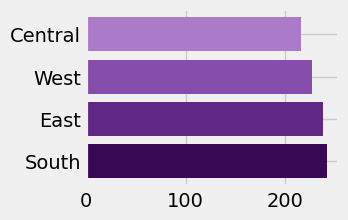

In [ ]:
plt.subplot(2,2,2)
plt.barh(y=df_bar.index, width='Sales', color=['#380854','#612785','#874dab','#ab7bc9'], data=df_bar)
#plt.gca().invert_yaxis()
plt.show()

**Check trend over period of time:** *Goal: Understand the trend for Average Profit and Sales across all these years.*

In [ ]:
df_line = df[['Order Date','Sales','Profit']].sort_values('Order Date')
df_line.head()

,Order Date,Sales,Profit
8074,1/1/2017,13.748,-22.6842
848,1/1/2017,48.896,8.5568
8075,1/1/2017,15.224,-38.8212
8073,1/1/2017,6.470,-9.7050
8071,1/1/2017,310.744,-26.6352


In [ ]:
df_line["Order Date"]=pd.to_datetime(df_line['Order Date'])

In [ ]:
type(df_line["Order Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_line = df_line.groupby('Order Date').mean()

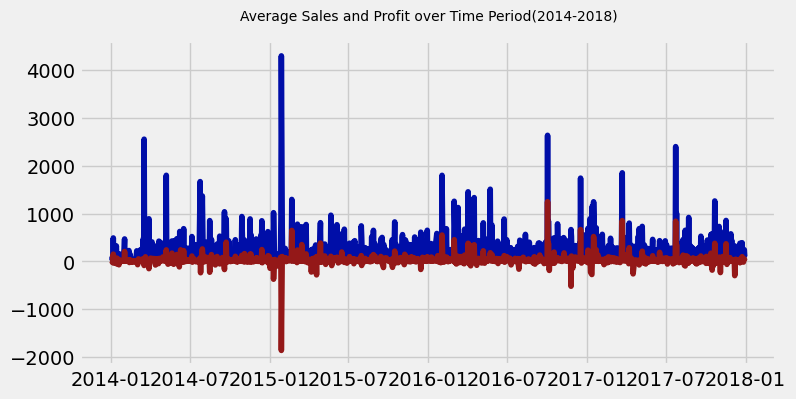

In [ ]:
plt.figure(figsize=[8,4])
plt.plot(df_line.index, 'Sales', data=df_line, color='#000ea8') # Avg Sales over Time
plt.plot(df_line.index, 'Profit', data=df_line, color='#941818') # Avg Profit over Time
plt.title("Average Sales and Profit over Time Period(2014-2018)", size=10, pad=15)
plt.show()

**Check Distribution:** *Goal:understand the distribution of Profit and Sales.*

In [ ]:
df_hist=df[['Sales','Profit']]

In [ ]:
df_hist.head()

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [ ]:
df_hist = df_hist[df_hist['Sales'] <= 2000]
df_hist = df_hist[df_hist['Profit'] <= 2000]
df_hist = df_hist[df_hist['Profit'] >= -200]

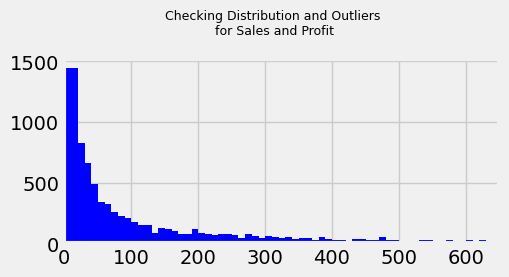

In [ ]:
plt.figure(figsize=[5,5])
plt.suptitle("Checking Distribution and Outliers \nfor Sales and Profit", size=9)
plt.subplot(2,1,1)
plt.hist(df_hist['Sales'], bins=200, color='blue')
plt.xlim(0,650)
plt.show()

<Axes: ylabel='Sales'>

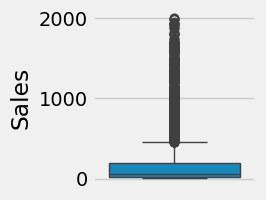

In [ ]:
# Boxplot of  for Sales
plt.subplot(2,3,3)
sns.boxplot(df_hist['Sales'])

<Axes: xlabel='Sales', ylabel='Density'>

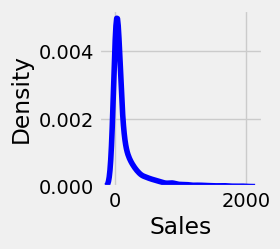

In [ ]:
# KDEPlot for Sales
plt.subplot(2,3,3)
sns.kdeplot(x=df_hist['Sales'], color='blue')

In [ ]:
df_hist['Sales'].describe()

,Sales
count,9718.000000
mean,169.878281
std,284.298010
min,0.444000
25%,16.606500
50%,50.226000
75%,191.073750
max,1999.960000


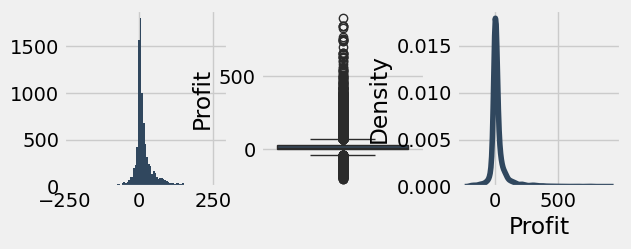

In [ ]:
# Histogram for Profit
plt.subplot(2,3,4)
plt.hist(df_hist['Profit'], bins=200, color='#30475E')
plt.xlim(-250,300)

# Boxplot of  for Profit
plt.subplot(2,3,5)
sns.boxplot(df_hist['Profit'], color='#30475E')

# KDEPlot for Profit
plt.subplot(2,3,6)
sns.kdeplot(x=df_hist['Profit'], color='#30475E')

plt.show()

In [ ]:
df_hist['Profit'].describe()

,Profit
count,9718.000000
mean,26.316213
std,75.912677
min,-199.770000
25%,1.962225
50%,8.709500
75%,28.706400
max,899.982000


**Relationship between numerical columns**:*Goal: understand how the Sales impact Profit for different Customer Segments.*

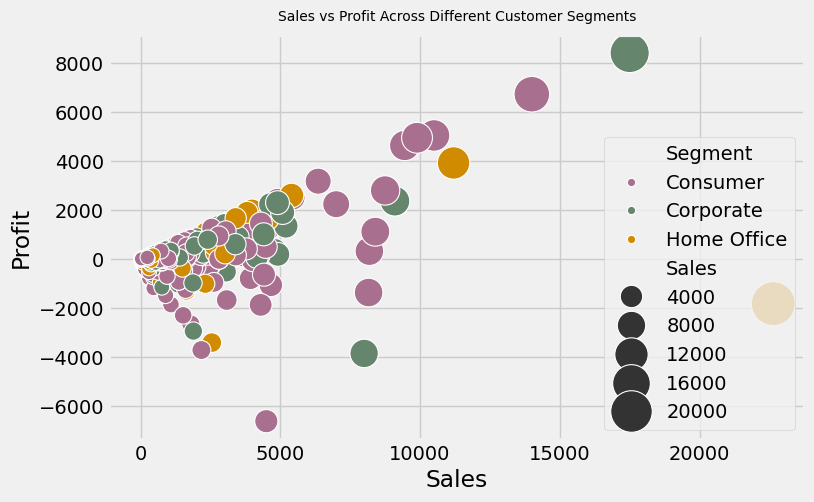

In [ ]:
df_scatter = df[['Sales','Profit','Segment']]

# Visualizing the ScatterPlot
plt.figure(figsize=[8,5])
# Profit in the Y axis, and Sales in the X. Hue will classify the dots according to Segment.
# The size of the dots are according to the volumen of "Sales".
sns.scatterplot(x=df_scatter['Sales'], y=df_scatter['Profit'], hue=df_scatter['Segment'], palette=['#a86f8f','#65856d','#d18b00'], size=df_scatter["Sales"], sizes=(100,1000), legend='auto')
plt.title("Sales vs Profit Across Different Customer Segments", size=10, pad=10)
plt.show()